# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

### Define latent distribution of the model

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.models import VAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np



valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 10
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=5.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 0
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="ReportFig/PVAE/cont_{}/gamma_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

L0Pair(256 -> 2*10, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_latent): Sequential(
    (0): L0Pair(256 -> 2*10, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
  )
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequenti

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [2]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'model32_params.pkl')
torch.save(model, './model32')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!

/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0/54000	Loss: 473.318	L0 Loss: 0.132
3200/54000	Loss: 251.821	L0 Loss: 0.132
6400/54000	Loss: 150.318	L0 Loss: 0.132
9600/54000	Loss: 149.984	L0 Loss: 0.132
12800/54000	Loss: 146.598	L0 Loss: 0.132
16000/54000	Loss: 138.387	L0 Loss: 0.132
19200/54000	Loss: 140.874	L0 Loss: 0.132
22400/54000	Loss: 145.076	L0 Loss: 0.132
25600/54000	Loss: 138.920	L0 Loss: 0.132
28800/54000	Loss: 140.058	L0 Loss: 0.132
32000/54000	Loss: 138.614	L0 Loss: 0.132
35200/54000	Loss: 136.960	L0 Loss: 0.132
38400/54000	Loss: 137.890	L0 Loss: 0.132
41600/54000	Loss: 132.376	L0 Loss: 0.132
44800/54000	Loss: 132.550	L0 Loss: 0.132
48000/54000	Loss: 130.210	L0 Loss: 0.132
51200/54000	Loss: 133.506	L0 Loss: 0.132
Valid Loss: 124.721, Recon Error: 0.045
124.72130820091735
Epoch: 1 Average loss: 146.04 Valid loss: 124.72130820091735	Recon Error:0.045
0/54000	Loss: 113.053	L0 Loss: 0.132
3200/54000	Loss: 125.192	L0 Loss: 0.132
6400/54000	Loss: 126.462	L0 Loss: 0.132
9600/54000	Loss: 128.361	L0 Loss: 0.132
12800/54000	Los

9600/54000	Loss: 61.270	L0 Loss: 0.136
12800/54000	Loss: 64.695	L0 Loss: 0.136
16000/54000	Loss: 63.239	L0 Loss: 0.136
19200/54000	Loss: 66.429	L0 Loss: 0.136
22400/54000	Loss: 64.703	L0 Loss: 0.136
25600/54000	Loss: 63.057	L0 Loss: 0.136
28800/54000	Loss: 63.781	L0 Loss: 0.136
32000/54000	Loss: 64.612	L0 Loss: 0.136
35200/54000	Loss: 63.202	L0 Loss: 0.136
38400/54000	Loss: 64.463	L0 Loss: 0.136
41600/54000	Loss: 61.329	L0 Loss: 0.136
44800/54000	Loss: 62.490	L0 Loss: 0.136
48000/54000	Loss: 60.658	L0 Loss: 0.136
51200/54000	Loss: 66.372	L0 Loss: 0.136
Valid Loss: 61.679, Recon Error: 0.041
61.678658586867314
Epoch: 11 Average loss: 63.74 Valid loss: 61.678658586867314	Recon Error:0.041
0/54000	Loss: 83.330	L0 Loss: 0.136
3200/54000	Loss: 61.580	L0 Loss: 0.136
6400/54000	Loss: 65.566	L0 Loss: 0.136
9600/54000	Loss: 61.662	L0 Loss: 0.136
12800/54000	Loss: 62.055	L0 Loss: 0.136
16000/54000	Loss: 66.572	L0 Loss: 0.136
19200/54000	Loss: 64.389	L0 Loss: 0.136
22400/54000	Loss: 62.655	L0 Los

19200/54000	Loss: 59.481	L0 Loss: 0.137
22400/54000	Loss: 62.604	L0 Loss: 0.137
25600/54000	Loss: 56.958	L0 Loss: 0.137
28800/54000	Loss: 56.977	L0 Loss: 0.137
32000/54000	Loss: 58.128	L0 Loss: 0.137
35200/54000	Loss: 60.113	L0 Loss: 0.137
38400/54000	Loss: 57.304	L0 Loss: 0.137
41600/54000	Loss: 56.755	L0 Loss: 0.137
44800/54000	Loss: 61.844	L0 Loss: 0.137
48000/54000	Loss: 61.804	L0 Loss: 0.137
51200/54000	Loss: 55.328	L0 Loss: 0.137
Valid Loss: 59.811, Recon Error: 0.032
59.810983231727114
Epoch: 21 Average loss: 58.45 Valid loss: 59.810983231727114	Recon Error:0.032
0/54000	Loss: 79.853	L0 Loss: 0.137
3200/54000	Loss: 58.039	L0 Loss: 0.137
6400/54000	Loss: 59.021	L0 Loss: 0.137
9600/54000	Loss: 58.511	L0 Loss: 0.137
12800/54000	Loss: 57.793	L0 Loss: 0.137
16000/54000	Loss: 59.256	L0 Loss: 0.137
19200/54000	Loss: 53.930	L0 Loss: 0.137
22400/54000	Loss: 54.033	L0 Loss: 0.137
25600/54000	Loss: 59.750	L0 Loss: 0.137
28800/54000	Loss: 56.419	L0 Loss: 0.136
32000/54000	Loss: 60.564	L0 Lo

28800/54000	Loss: 49.969	L0 Loss: 0.116
32000/54000	Loss: 50.840	L0 Loss: 0.115
35200/54000	Loss: 51.249	L0 Loss: 0.115
38400/54000	Loss: 50.897	L0 Loss: 0.115
41600/54000	Loss: 49.046	L0 Loss: 0.114
44800/54000	Loss: 52.630	L0 Loss: 0.114
48000/54000	Loss: 49.149	L0 Loss: 0.114
51200/54000	Loss: 51.970	L0 Loss: 0.114
Valid Loss: 50.856, Recon Error: 0.030
50.85562641062635
Epoch: 31 Average loss: 50.70 Valid loss: 50.85562641062635	Recon Error:0.030
0/54000	Loss: 38.660	L0 Loss: 0.113
3200/54000	Loss: 54.278	L0 Loss: 0.113
6400/54000	Loss: 48.838	L0 Loss: 0.113
9600/54000	Loss: 50.638	L0 Loss: 0.112
12800/54000	Loss: 51.899	L0 Loss: 0.112
16000/54000	Loss: 52.158	L0 Loss: 0.112
19200/54000	Loss: 54.296	L0 Loss: 0.111
22400/54000	Loss: 50.206	L0 Loss: 0.111
25600/54000	Loss: 53.488	L0 Loss: 0.111
28800/54000	Loss: 54.138	L0 Loss: 0.110
32000/54000	Loss: 53.283	L0 Loss: 0.110
35200/54000	Loss: 48.940	L0 Loss: 0.110
38400/54000	Loss: 52.861	L0 Loss: 0.109
41600/54000	Loss: 48.546	L0 Loss

38400/54000	Loss: 47.775	L0 Loss: 0.069
41600/54000	Loss: 46.047	L0 Loss: 0.069
44800/54000	Loss: 46.132	L0 Loss: 0.068
48000/54000	Loss: 44.705	L0 Loss: 0.068
51200/54000	Loss: 46.718	L0 Loss: 0.068
Valid Loss: 42.992, Recon Error: 0.034
42.992370443141205
Epoch: 41 Average loss: 45.16 Valid loss: 42.992370443141205	Recon Error:0.034
0/54000	Loss: 40.759	L0 Loss: 0.068
3200/54000	Loss: 43.302	L0 Loss: 0.068
6400/54000	Loss: 44.121	L0 Loss: 0.068
9600/54000	Loss: 44.531	L0 Loss: 0.067
12800/54000	Loss: 44.880	L0 Loss: 0.067
16000/54000	Loss: 43.539	L0 Loss: 0.067
19200/54000	Loss: 44.528	L0 Loss: 0.067
22400/54000	Loss: 46.298	L0 Loss: 0.067
25600/54000	Loss: 41.943	L0 Loss: 0.067
28800/54000	Loss: 42.991	L0 Loss: 0.067
32000/54000	Loss: 44.982	L0 Loss: 0.067
35200/54000	Loss: 43.609	L0 Loss: 0.066
38400/54000	Loss: 42.704	L0 Loss: 0.066
41600/54000	Loss: 43.362	L0 Loss: 0.066
44800/54000	Loss: 43.366	L0 Loss: 0.066
48000/54000	Loss: 45.785	L0 Loss: 0.066
51200/54000	Loss: 42.756	L0 Lo

48000/54000	Loss: 41.335	L0 Loss: 0.054
51200/54000	Loss: 40.755	L0 Loss: 0.054
Valid Loss: 41.548, Recon Error: 0.036
41.548291551305894
Epoch: 51 Average loss: 41.59 Valid loss: 41.548291551305894	Recon Error:0.036
0/54000	Loss: 44.035	L0 Loss: 0.053
3200/54000	Loss: 40.842	L0 Loss: 0.053
6400/54000	Loss: 41.033	L0 Loss: 0.053
9600/54000	Loss: 41.081	L0 Loss: 0.053
12800/54000	Loss: 41.010	L0 Loss: 0.053
16000/54000	Loss: 40.217	L0 Loss: 0.053
19200/54000	Loss: 41.313	L0 Loss: 0.053
22400/54000	Loss: 40.829	L0 Loss: 0.053
25600/54000	Loss: 41.039	L0 Loss: 0.053
28800/54000	Loss: 41.078	L0 Loss: 0.053
32000/54000	Loss: 40.672	L0 Loss: 0.053
35200/54000	Loss: 40.575	L0 Loss: 0.053
38400/54000	Loss: 41.811	L0 Loss: 0.053
41600/54000	Loss: 40.894	L0 Loss: 0.053
44800/54000	Loss: 40.835	L0 Loss: 0.053
48000/54000	Loss: 40.796	L0 Loss: 0.053
51200/54000	Loss: 40.811	L0 Loss: 0.053
Valid Loss: 40.821, Recon Error: 0.034
40.820553596983565
Epoch: 52 Average loss: 40.97 Valid loss: 40.8205535

0/54000	Loss: 43.871	L0 Loss: 0.048
3200/54000	Loss: 40.659	L0 Loss: 0.048
6400/54000	Loss: 40.521	L0 Loss: 0.048
9600/54000	Loss: 40.119	L0 Loss: 0.048
12800/54000	Loss: 40.101	L0 Loss: 0.048
16000/54000	Loss: 40.355	L0 Loss: 0.048
19200/54000	Loss: 40.924	L0 Loss: 0.048
22400/54000	Loss: 40.521	L0 Loss: 0.048
25600/54000	Loss: 40.140	L0 Loss: 0.048
28800/54000	Loss: 40.638	L0 Loss: 0.048
32000/54000	Loss: 40.524	L0 Loss: 0.048
35200/54000	Loss: 40.690	L0 Loss: 0.048
38400/54000	Loss: 40.264	L0 Loss: 0.048
41600/54000	Loss: 40.456	L0 Loss: 0.048
44800/54000	Loss: 40.505	L0 Loss: 0.048
48000/54000	Loss: 40.633	L0 Loss: 0.047
51200/54000	Loss: 40.301	L0 Loss: 0.047
Valid Loss: 40.445, Recon Error: 0.029
40.44495119947068
Epoch: 62 Average loss: 40.44 Valid loss: 40.44495119947068	Recon Error:0.029
0/54000	Loss: 42.963	L0 Loss: 0.047
3200/54000	Loss: 40.377	L0 Loss: 0.047
6400/54000	Loss: 40.447	L0 Loss: 0.047
9600/54000	Loss: 40.066	L0 Loss: 0.047
12800/54000	Loss: 40.579	L0 Loss: 0.047

9600/54000	Loss: 40.097	L0 Loss: 0.044
12800/54000	Loss: 40.040	L0 Loss: 0.044
16000/54000	Loss: 40.514	L0 Loss: 0.044
19200/54000	Loss: 40.057	L0 Loss: 0.044
22400/54000	Loss: 40.239	L0 Loss: 0.044
25600/54000	Loss: 40.132	L0 Loss: 0.044
28800/54000	Loss: 40.244	L0 Loss: 0.044
32000/54000	Loss: 39.746	L0 Loss: 0.044
35200/54000	Loss: 39.376	L0 Loss: 0.044
38400/54000	Loss: 39.754	L0 Loss: 0.044
41600/54000	Loss: 40.076	L0 Loss: 0.044
44800/54000	Loss: 39.822	L0 Loss: 0.044
48000/54000	Loss: 39.669	L0 Loss: 0.044
51200/54000	Loss: 40.157	L0 Loss: 0.044
Valid Loss: 39.873, Recon Error: 0.029
39.87250453867811
Epoch: 72 Average loss: 40.02 Valid loss: 39.87250453867811	Recon Error:0.029
0/54000	Loss: 43.389	L0 Loss: 0.044
3200/54000	Loss: 40.292	L0 Loss: 0.044
6400/54000	Loss: 39.500	L0 Loss: 0.044
9600/54000	Loss: 40.392	L0 Loss: 0.044
12800/54000	Loss: 40.591	L0 Loss: 0.044
16000/54000	Loss: 39.902	L0 Loss: 0.044
19200/54000	Loss: 39.457	L0 Loss: 0.044
22400/54000	Loss: 40.368	L0 Loss:

19200/54000	Loss: 39.821	L0 Loss: 0.039
22400/54000	Loss: 39.392	L0 Loss: 0.039
25600/54000	Loss: 40.070	L0 Loss: 0.039
28800/54000	Loss: 39.938	L0 Loss: 0.039
32000/54000	Loss: 39.764	L0 Loss: 0.039
35200/54000	Loss: 39.581	L0 Loss: 0.039
38400/54000	Loss: 39.877	L0 Loss: 0.039
41600/54000	Loss: 39.643	L0 Loss: 0.039
44800/54000	Loss: 39.731	L0 Loss: 0.039
48000/54000	Loss: 39.732	L0 Loss: 0.039
51200/54000	Loss: 39.594	L0 Loss: 0.039
Valid Loss: 39.583, Recon Error: 0.036
39.582936794199846
Epoch: 82 Average loss: 39.73 Valid loss: 39.582936794199846	Recon Error:0.036
0/54000	Loss: 40.505	L0 Loss: 0.039
3200/54000	Loss: 39.195	L0 Loss: 0.039
6400/54000	Loss: 39.806	L0 Loss: 0.039
9600/54000	Loss: 39.477	L0 Loss: 0.039
12800/54000	Loss: 39.861	L0 Loss: 0.039
16000/54000	Loss: 39.795	L0 Loss: 0.039
19200/54000	Loss: 39.976	L0 Loss: 0.039
22400/54000	Loss: 40.104	L0 Loss: 0.039
25600/54000	Loss: 39.795	L0 Loss: 0.039
28800/54000	Loss: 39.393	L0 Loss: 0.039
32000/54000	Loss: 39.679	L0 Lo

28800/54000	Loss: 39.688	L0 Loss: 0.034
32000/54000	Loss: 39.317	L0 Loss: 0.034
35200/54000	Loss: 39.387	L0 Loss: 0.034
38400/54000	Loss: 39.203	L0 Loss: 0.034
41600/54000	Loss: 39.780	L0 Loss: 0.034
44800/54000	Loss: 39.475	L0 Loss: 0.034
48000/54000	Loss: 39.258	L0 Loss: 0.034
51200/54000	Loss: 39.478	L0 Loss: 0.034
Valid Loss: 39.612, Recon Error: 0.032
39.61161268518326
Epoch: 92 Average loss: 39.52 Valid loss: 39.61161268518326	Recon Error:0.032
0/54000	Loss: 40.508	L0 Loss: 0.034
3200/54000	Loss: 39.175	L0 Loss: 0.033
6400/54000	Loss: 39.513	L0 Loss: 0.033
9600/54000	Loss: 39.180	L0 Loss: 0.033
12800/54000	Loss: 39.655	L0 Loss: 0.033
16000/54000	Loss: 39.496	L0 Loss: 0.033
19200/54000	Loss: 39.723	L0 Loss: 0.033
22400/54000	Loss: 40.158	L0 Loss: 0.033
25600/54000	Loss: 40.117	L0 Loss: 0.033
28800/54000	Loss: 38.999	L0 Loss: 0.033
32000/54000	Loss: 39.522	L0 Loss: 0.033
35200/54000	Loss: 39.576	L0 Loss: 0.033
38400/54000	Loss: 39.640	L0 Loss: 0.033
41600/54000	Loss: 39.765	L0 Loss

In [3]:
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
model.load_state_dict(torch.load('model32_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
print(lr)

L0Pair(256 -> 2*10, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
18760
0.0005


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

unsaved tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]], device='cuda:0',
       grad_fn=<ViewBackward>)
(8, 8)
1.0


/data/home/ISO/Pruned_VAE/viz/visualize_c.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


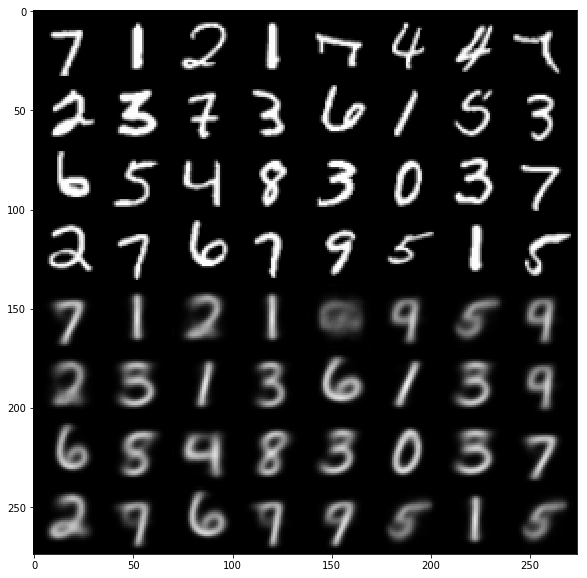

In [4]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
# recon=np.rollaxis(recon.numpy(), 0, 3)  
# print(recon[265:,:,:].max())
# recon[:,:,:]=(recon[:,:,:]+1)/2
# plt.imshow(recon[:,:,:].astype(float))

#MNIST
plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")
print(recon.numpy()[0, :, :].max())



In [5]:
test_batch = iter(test_loader)
test_batch = next(test_batch)
latent_dist,mask,_ = model.encode(torch.tensor(test_batch[0]).cuda())

print(mask,len(torch.nonzero(mask[0]==0)))

# for latent in latent_dist['cont'][0]:
#     count=torch.zeros((1,32))
#     latent[latent<1e-7]=0
    
#     for i in range(128):
    
#     #print(latent[i].size(),torch.nonzero(latent[i]))#len(torch.nonzero(latent[0]==0))
#         count[latent[i].reshape(1,32)!=0] += 1
#     print(count)
def show_idx(mask):
    a = mask.cpu().detach().numpy().squeeze()
    return np.array(np.where(a==1))+1
    

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]], device='cuda:0',
       grad_fn=<ViewBackward>) 8


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [6]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist, mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist,mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


1.9649745582774947 0.007648753452277288
Valid Loss: 39.591, Recon Error: 0.030


(39.59134676502009, tensor(0.0298, device='cuda:0', grad_fn=<DivBackward0>))

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


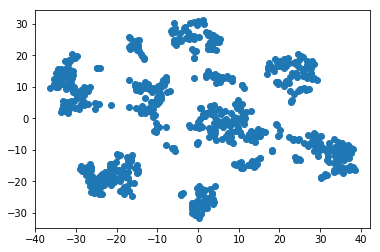

In [7]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist,_ ,_= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

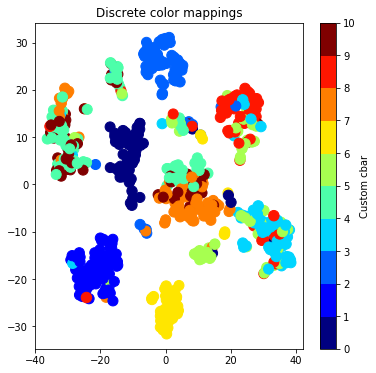

In [8]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

0.5


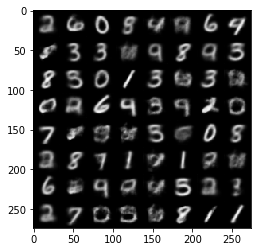

In [9]:
# Plot samples
import matplotlib as mpl

#MNIST
samples = viz.samples()
sample=samples.numpy()[0, :, :]/2+0.5
plt.imshow(sample, cmap='gray')
plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

print((sample).min())

# face
# fig = plt.figure(figsize=(50, 50)) 
# samples = viz.samples()
# samples = np.rollaxis(samples.numpy(), 0, 3)  
# print(samples[:,:,0].max())
# samples=(samples+1)/2
# plt.imshow(samples.astype(float),norm = norm)
# plt.imsave(path+"/samples",samples)
###DIP

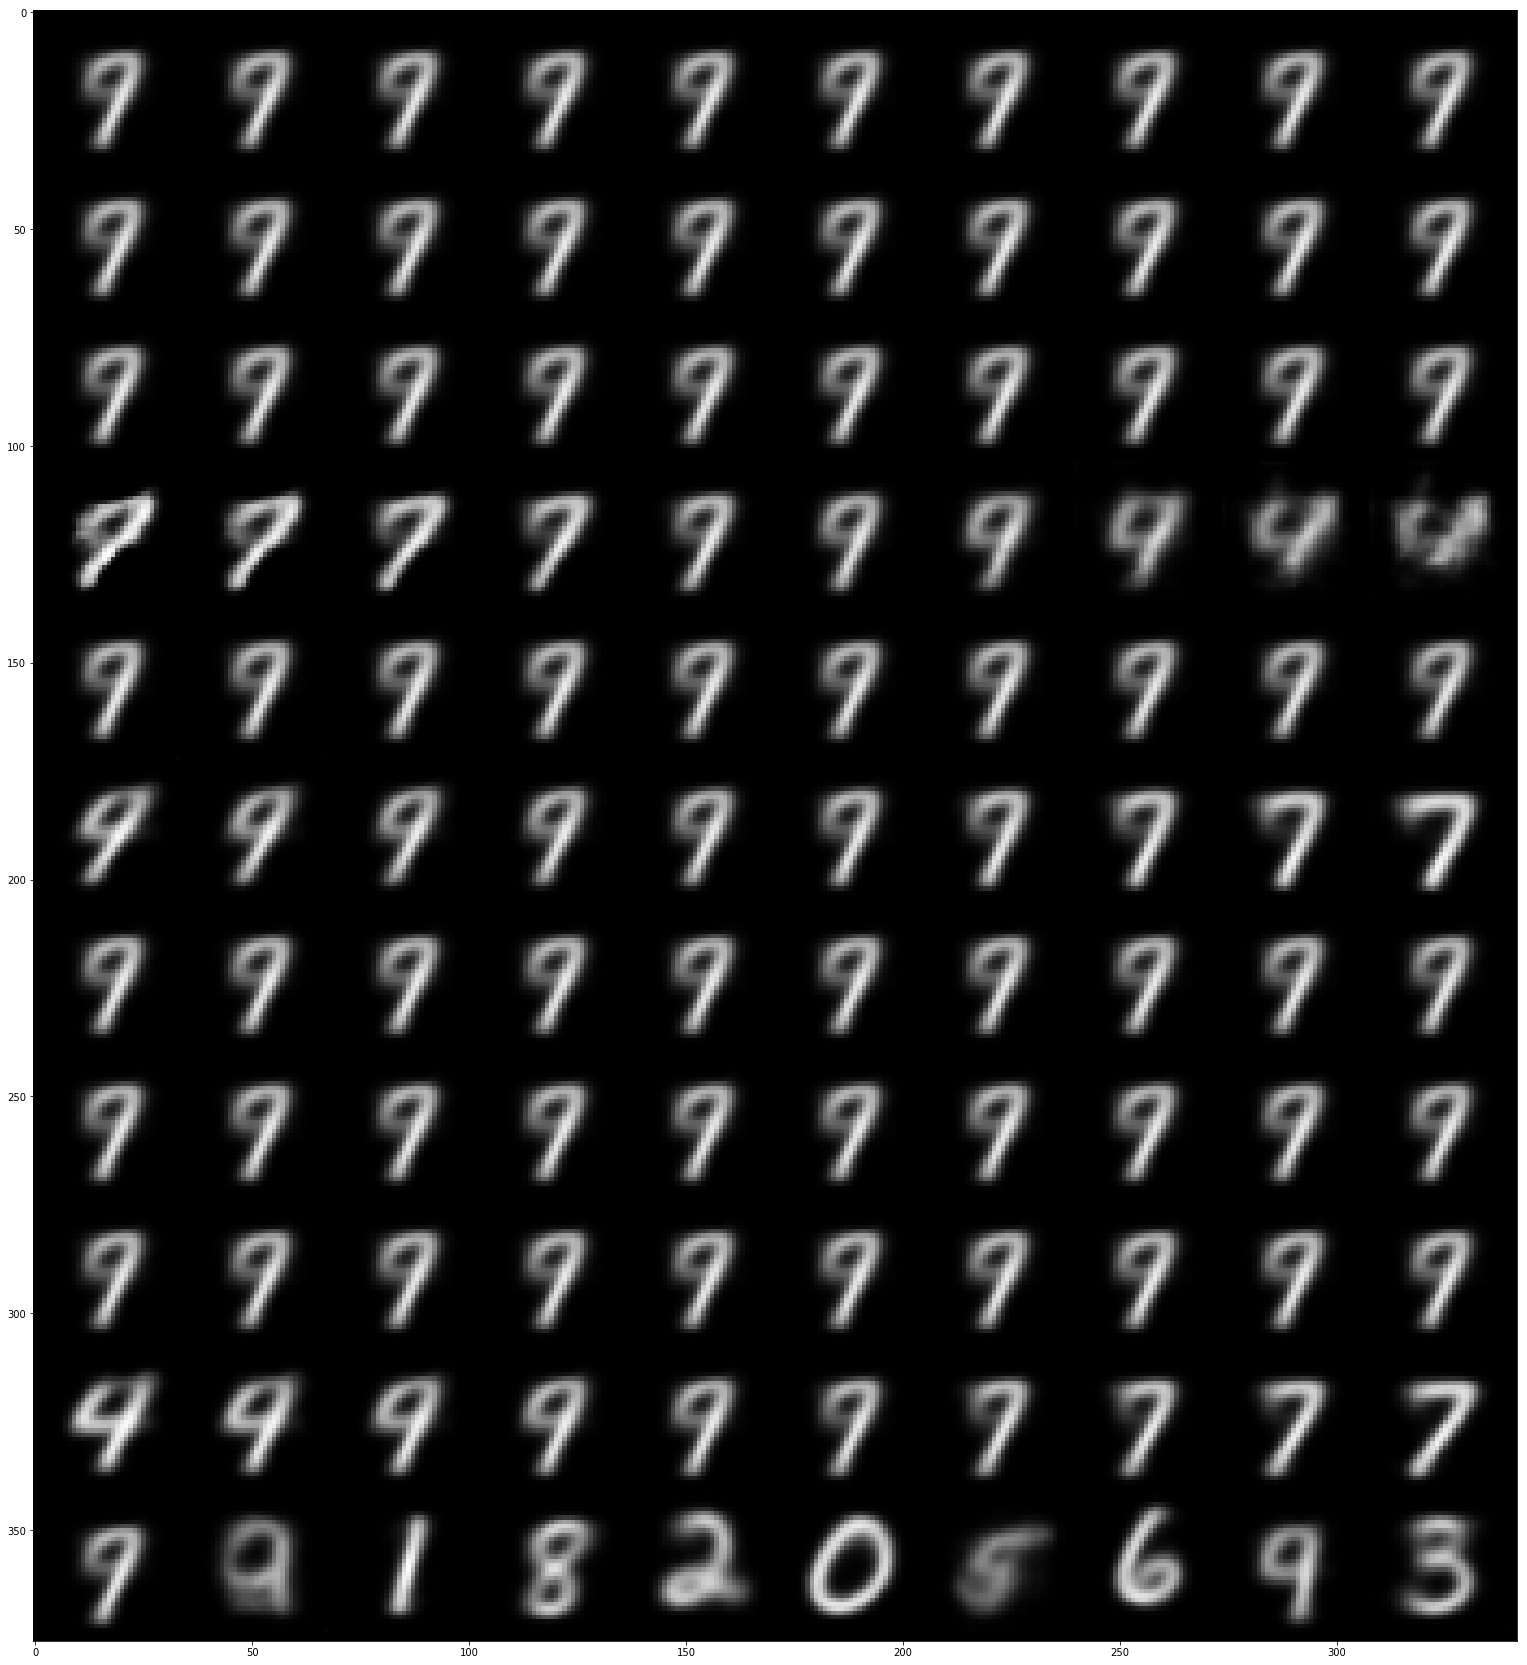

In [10]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)  
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

array([[ 6, 10]])

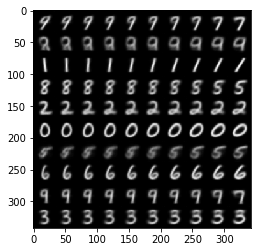

In [11]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
show_idx(mask)
#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


array([[ 6, 10]])

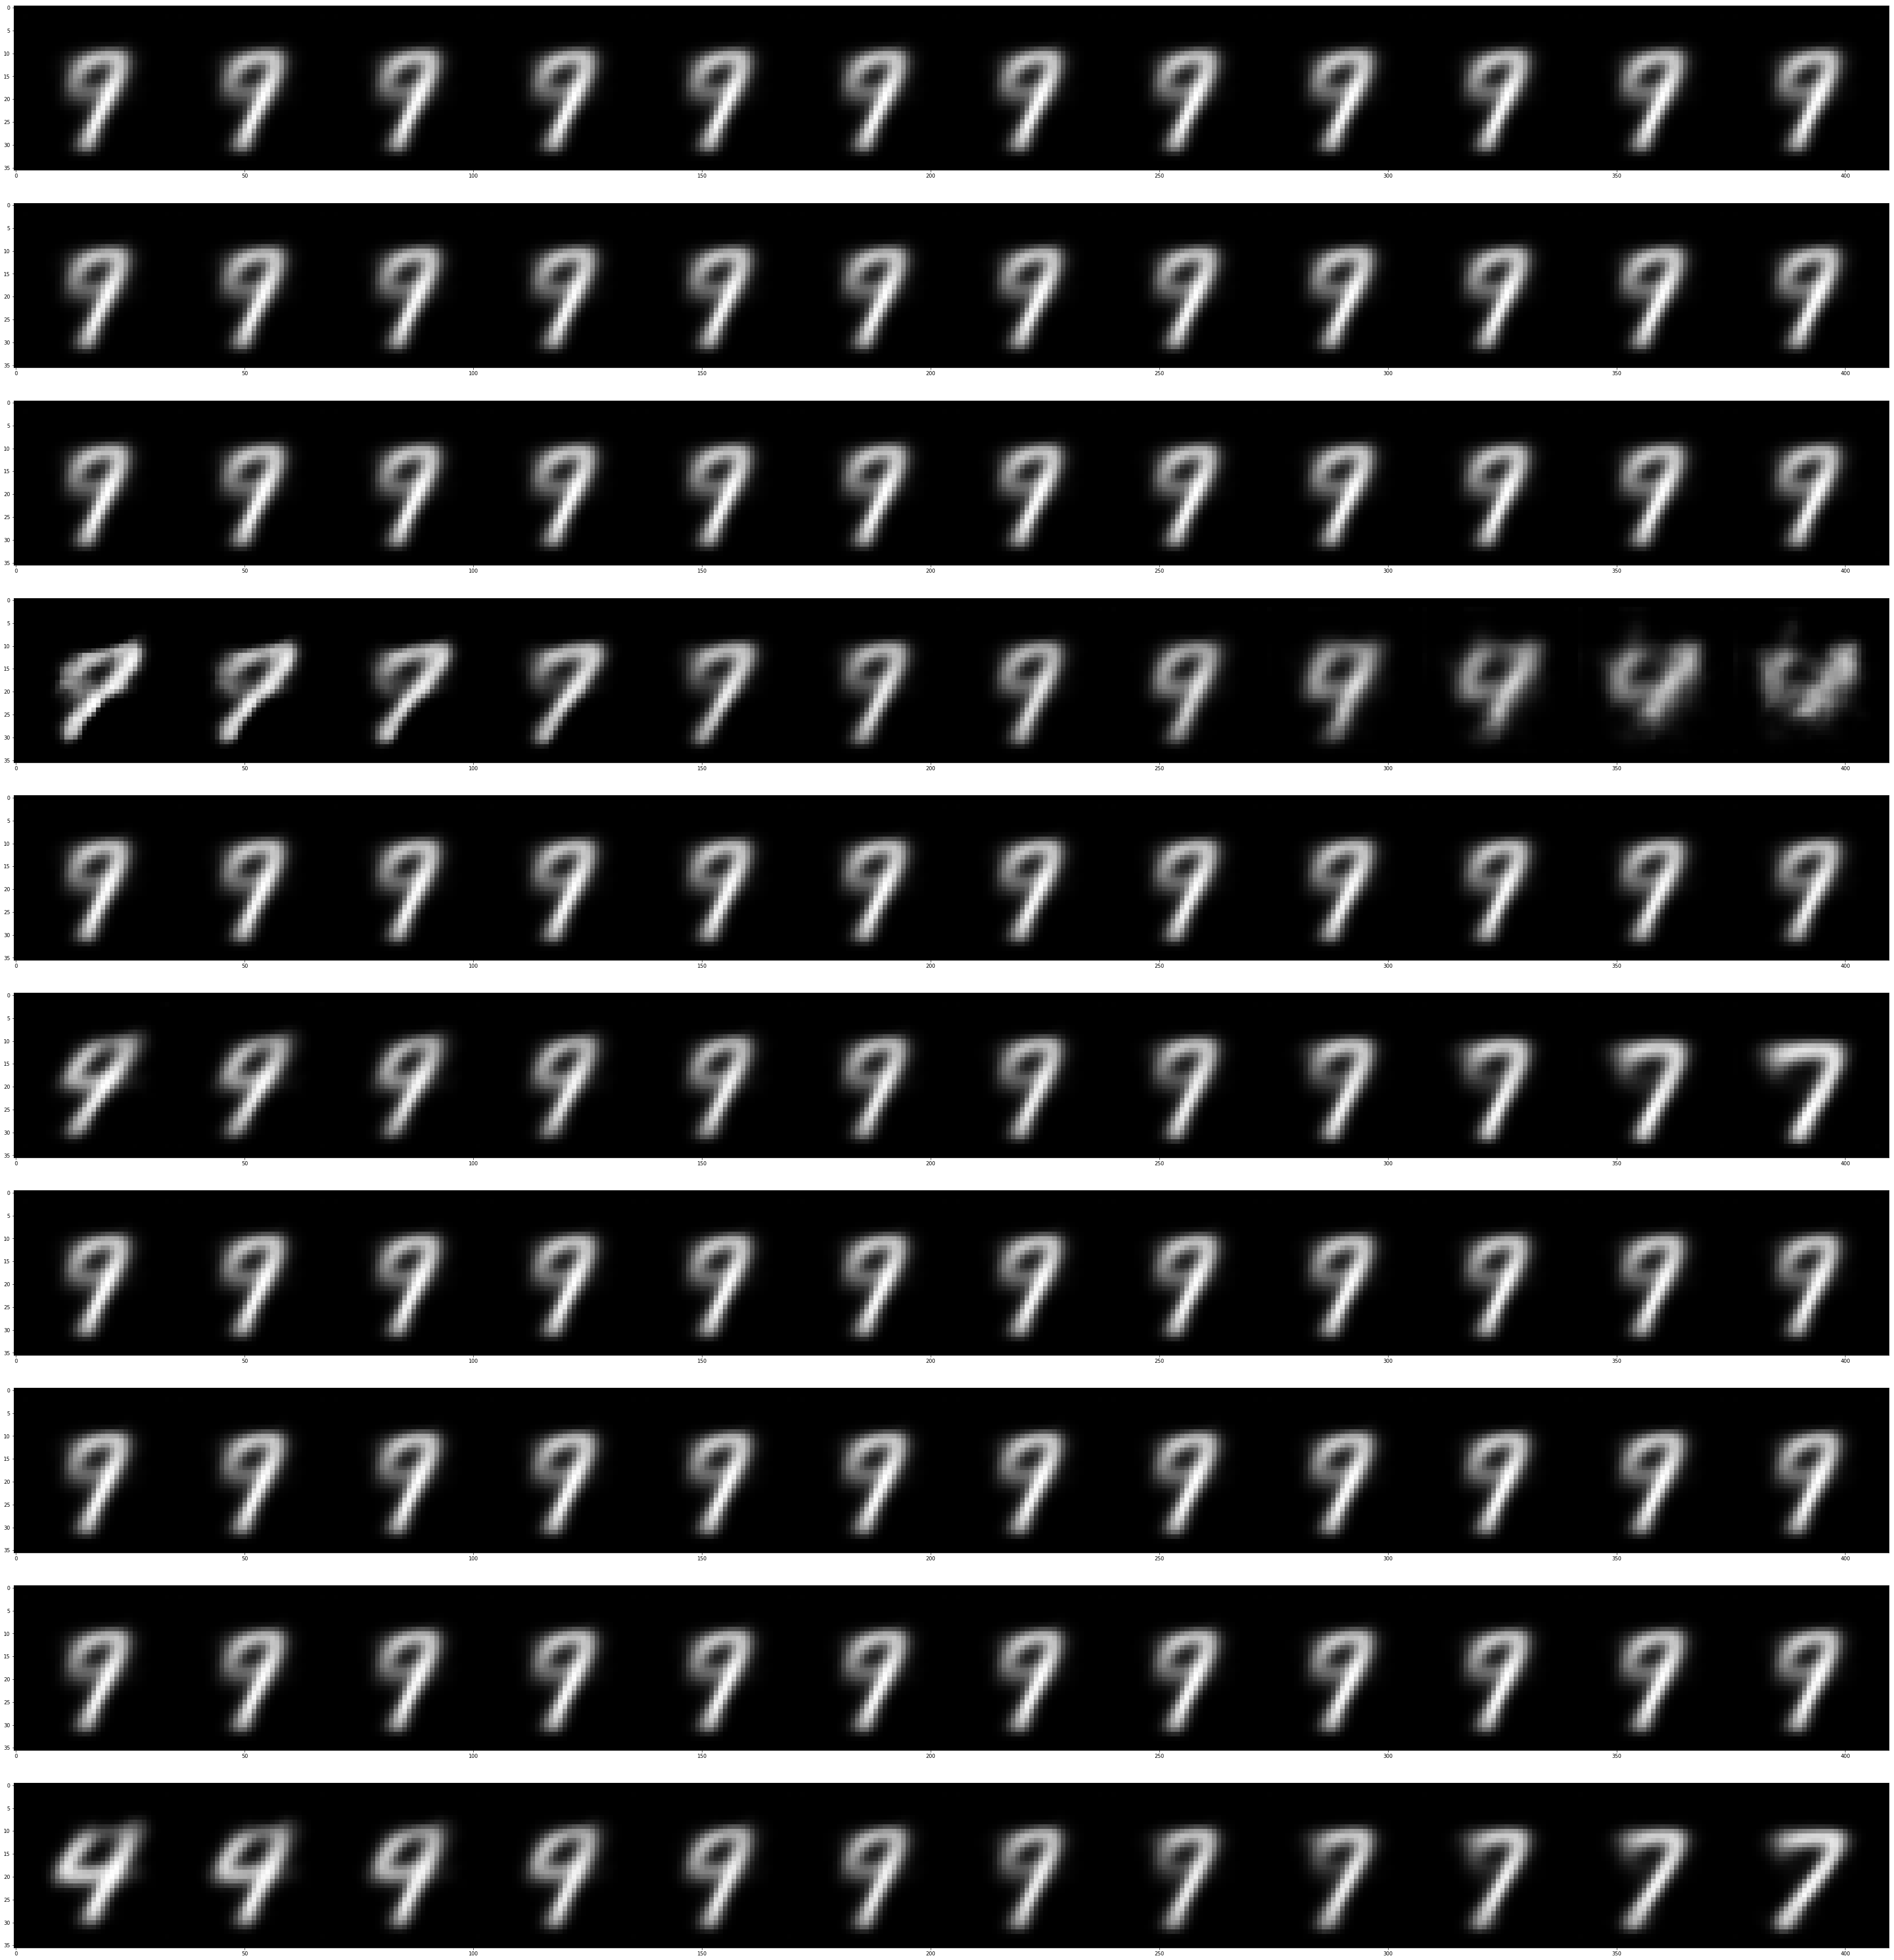

In [12]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
    sub = fig.add_subplot(n_cont, 1, i + 1)
    plt.savefig(path+"/cont{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     traversals=(traversals+1)/2
#     plt.imshow(traversals)   
plt.savefig(path+"/cont.png")

show_idx(mask)
    

discrete


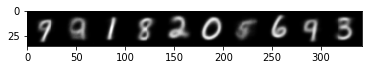

In [13]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
    sub = fig.add_subplot(n_disc, 1, i + 1)
    plt.savefig(path+"/disc{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_disc, 1, i + 1)
# traversals=(traversals+1)/2
# plt.savefig(path+"/disc{}.png".format(i))
# plt.imshow(traversals)

In [14]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
#         generated = (generated +1)/2
#         print(generated.min(),generated.max())
#         plt.imshow(generated)

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#             result = model.decode(latent_samples).cpu()
#         return result

#MNIST
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        plt.imshow(generated.detach().numpy(),cmap="gray")

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
        return model.decode(latent_samples).cpu()

In [15]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)
show_idx(mask)

interactive(children=(IntSlider(value=5, description='cont_idx', max=10), FloatSlider(value=0.0, description='…

array([[ 6, 10]])